<h1>Annotating images</h1>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import ast
from tqdm.notebook import tqdm

%matplotlib inline

In [46]:
INPUT_DIR = '../input'
TRAIN_IMAGES = '../input/train'
ANNOTATED_IMAGES = '../input/annotated'

In [20]:
annotations_df = pd.read_csv(os.path.join(INPUT_DIR, 'train_annotations.csv'), 
                             index_col = 'StudyInstanceUID')
annotations_df.head()

,label,data
StudyInstanceUID,,
1.2.826.0.1.3680043.8.498.12616281126973421762775197134528405307,CVC - Normal,"[[1487, 1279], [1477, 1168], [1472, 1052], [14..."
1.2.826.0.1.3680043.8.498.12616281126973421762775197134528405307,CVC - Normal,"[[1328, 7], [1347, 101], [1383, 193], [1400, 2..."
1.2.826.0.1.3680043.8.498.72921907356394389969069434057117070831,CVC - Borderline,"[[801, 1207], [812, 1112], [823, 1023], [842, ..."
1.2.826.0.1.3680043.8.498.11697104485452001927211929869950495038,CVC - Normal,"[[1366, 961], [1411, 861], [1453, 751], [1508,..."
1.2.826.0.1.3680043.8.498.87704688663091069148917694611057585294,NGT - Normal,"[[1862, 14], [1845, 293], [1801, 869], [1716, ..."


In [33]:
# Create a cmap to color each class

classes = ['ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal', 'NGT - Abnormal', 
           'NGT - Borderline', 'NGT - Incompletely Imaged', 'NGT - Normal', 'CVC - Abnormal',
           'CVC - Borderline', 'CVC - Normal', 'Swan Ganz Catheter Present'
          ]

colors = [
    (255, 0, 40), (255, 93, 0), (255, 234, 0), (140, 255, 0), (0, 255, 0), (0, 255, 139), 
    (0, 235, 255), (0, 94, 255), (41, 0, 255), (182, 0, 255), (255, 0, 191)
]

cmap = {key: color for key, color in zip(classes, colors)}

In [206]:
def show_image(image):
    fig, ax = plt.subplots(figsize=(7,7))
    ax.imshow(image, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def show_original_and_annotated(original, annotated):
    fig, ax = plt.subplots(1, 2, figsize=(12,7))
    ax[0].imshow(original, cmap='gray')
    plt.axis('off')
    ax[1].imshow(annotated, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def show_several(path):
    images = os.listdir(path)
    fig, ax = plt.subplots(3, 3, figsize=(15,15))
    ax = ax.reshape(-1)
    for i in range(ax.shape[0]):
        index = np.random.randint(len(images))
        image = cv2.imread(os.path.join(path, images[index]))
        ax[i].imshow(image, cmap='gray')
        ax[i].axis('off')
    
    plt.tight_layout()
    plt.show()

In [187]:
# Annotation function

def annotate(img, target, raw):
    annotation = ast.literal_eval(raw)
    annotation = np.array(annotation, dtype=np.int32)
    annotation = np.expand_dims(annotation, axis=0)
    cv2.polylines(img, annotation, False, cmap[target], 5)
    return img

In [208]:
for index in tqdm(annotations_df.index.unique()):
    img = cv2.imread(os.path.join(TRAIN_IMAGES, index + '.jpg'))
    annotated_img = img.copy()
    annotations = annotations_df.loc[index]
    if isinstance(annotations, pd.DataFrame):
        for label, data in annotations.values:
            annotate(annotated_img, label, data)
    else:
        annotate(annotated_img, annotations['label'], annotations['data'])
        
    cv2.imwrite(os.path.join(ANNOTATED_IMAGES, index + '.jpg'), annotated_img)

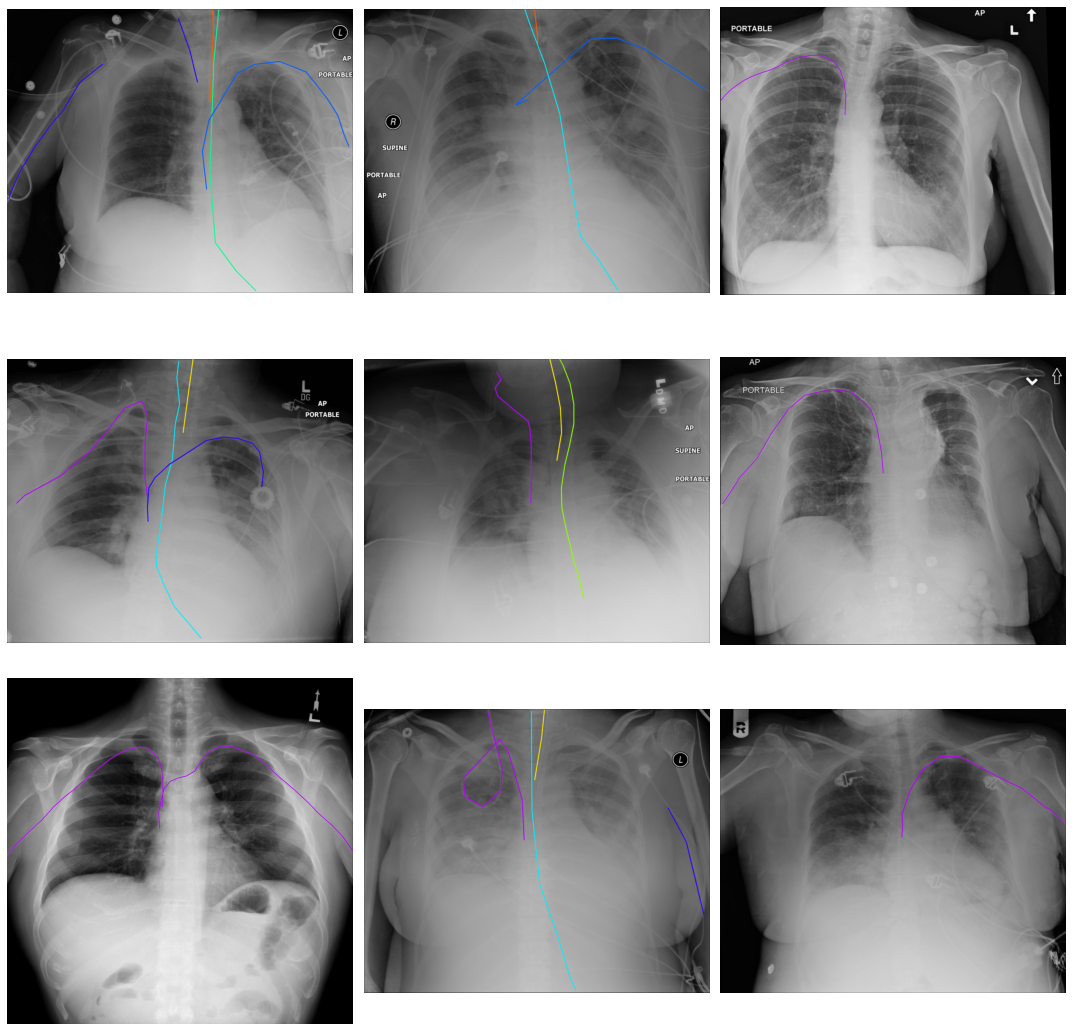

In [227]:
show_several(ANNOTATED_IMAGES)

In [218]:
train_df = pd.read_csv(os.path.join(INPUT_DIR, 'train.csv'), index_col='StudyInstanceUID')
train_df.head()

,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
StudyInstanceUID,,,,,,,,,,,,
1.2.826.0.1.3680043.8.498.26697628953273228189375557799582420561,0,0,0,0,0,0,1,0,0,0,0,ec89415d1
1.2.826.0.1.3680043.8.498.46302891597398758759818628675365157729,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c
1.2.826.0.1.3680043.8.498.23819260719748494858948050424870692577,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5
1.2.826.0.1.3680043.8.498.68286643202323212801283518367144358744,0,0,0,0,0,0,0,1,0,0,0,c31019814
1.2.826.0.1.3680043.8.498.10050203009225938259119000528814762175,0,0,0,0,0,0,0,0,0,1,0,207685cd1


In [219]:
with_annotations = annotations_df.index.unique()
len(with_annotations)

9095

In [222]:
annotated_train_df = train_df.loc[with_annotations]
annotated_train_df.reset_index(inplace=True)
annotated_train_df.to_csv(os.path.join(INPUT_DIR, 'annotated_train.csv'), index=False)